#### 线性回归

In [2]:
!head -10 datasets/ex0.txt

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import seaborn as sn
%matplotlib inline

In [8]:
data = pd.read_csv("datasets/ex0.txt", "\t", header=None)
data[1]

0      0.067732
1      0.427810
2      0.995731
3      0.738336
4      0.981083
         ...   
195    0.257017
196    0.833735
197    0.070095
198    0.527070
199    0.116163
Name: 1, Length: 200, dtype: float64

In [2]:
sn.set_style("whitegrid")

In [12]:
x,y=data[1],data[2]

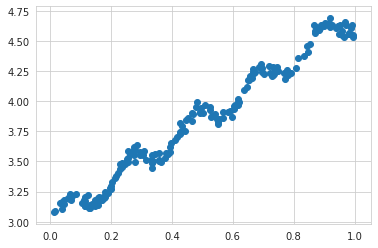

In [11]:
plt.scatter(x,y)

#### 标准的最小二乘法
w=(X^T * X)^-1*X^T*y

In [120]:
def stand_regression(x, y):
    x_mat = np.mat(x)
    y_mat = np.mat(y).T
    x_Tx = x_mat.T * x_mat
    if np.linalg.det(x_Tx) == 0.0:
        print("The matrix is singular, can't do inverse")
    return x_Tx.I * (x_mat.T * y_mat)

In [3]:
def load_data(file_name):
    X = []
    y = []
    with open(file_name) as file:
        for line in file.readlines():
            curr_line = line.strip().split("\t")
            curr_line = [float(e) for e in curr_line]
            x0, y0 = curr_line[:-1], curr_line[-1]
            X.append(x0)
            y.append(y0)
    return X, y

In [4]:
file_name = "datasets/ex0.txt"
X, y = load_data(file_name)

In [34]:
a[:-1]

[1, 2]

In [53]:
ws=stand_regression(X,y)
ws

matrix([[3.00774324],
        [1.69532264]])

- 假定x0=1.0
- y=ws[0]+ws[1]*x1

In [68]:
x_mat = np.mat(X)
y_mat = np.mat(y)
y_hat=x_mat*ws
y_hat[:10]

matrix([[3.12257084],
        [3.73301922],
        [4.69582855],
        [4.25946098],
        [4.67099547],
        [3.89977285],
        [3.65007895],
        [3.06514517],
        [3.23286683],
        [3.24221654]])

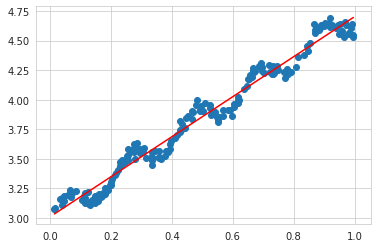

In [86]:
plt.scatter(x_mat[:,1].flatten().A[0],y_mat.T[:,0].flatten().A[0])
x_copy = x_mat.copy()
x_copy.sort(0)
plt.plot(x_copy[:, 1], x_copy * ws,'r')

In [87]:
#相关性
np.corrcoef(y_hat.T,y_mat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

#### 局部加权线性回归

回归系数
w=(X^T*W*X)^-1*X^T*Wy

In [15]:
def lwlr(x, X, y, k=1.0):
    x_mat = np.mat(X)
    y_mat = np.mat(y).T
    m = x_mat.shape[0]
    weights = np.mat(np.eye((m)))
    for i in range(m):
        diff_mat = x - x_mat[i, :]
        weights[i, i] = np.exp(diff_mat * diff_mat.T / (-2.0 * k**2))
    x_Tx = x_mat.T * (weights * x_mat)
    if np.linalg.det(x_Tx) == 0.0:
        print("The matrix is singular, can't do inverse")
        return
    ws = x_Tx.I * (x_mat.T * weights * y_mat)
    return x * ws

In [6]:
    X[0]

[1.0, 0.067732]

In [16]:
lwlr(X[0],X,y)

matrix([[3.12204471]])

In [17]:
lwlr(X[0],X,y,0.001)

matrix([[3.20175729]])

In [72]:
def get_lwlr(x, X, y, k=1.0):
    return np.array([float(lwlr(i, X, y, k)) for i in X])

In [73]:
get_lwlr(X,X,y)[:10]

array([3.12204471, 3.73284336, 4.69692033, 4.25997574, 4.67205815,
       3.89979584, 3.64981617, 3.06462993, 3.23234485, 3.24169633])

In [75]:
y_hat_1=get_lwlr(X,X,y)
y_hat_1[:10]

array([3.12204471, 3.73284336, 4.69692033, 4.25997574, 4.67205815,
       3.89979584, 3.64981617, 3.06462993, 3.23234485, 3.24169633])

In [24]:
(lwlr(X[0],X,y,0.001))

3.201757285523478

In [37]:
# 排序 x_mat
x_mat=np.mat(X)
sort_i=x_mat[:,1].argsort(0)

In [41]:
x_sort=x_mat[sort_i][:,0,:]
x_sort[:10]

matrix([[1.      , 0.014855],
        [1.      , 0.015371],
        [1.      , 0.033859],
        [1.      , 0.038326],
        [1.      , 0.040486],
        [1.      , 0.045353],
        [1.      , 0.047744],
        [1.      , 0.058014],
        [1.      , 0.066379],
        [1.      , 0.067119]])

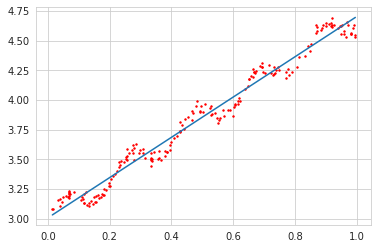

In [76]:
plt.plot(x_sort[:,1],y_hat_1[sort_i])
plt.scatter(x_mat[:,1].flatten().A[0],np.mat(y).T.flatten().A[0],s=2,c='red')

Text(1, 4, 'k=0.003')

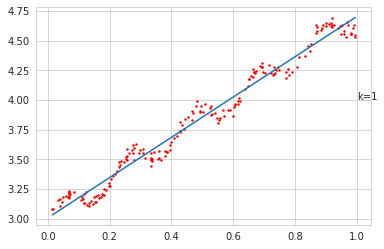

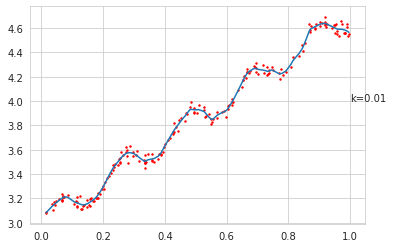

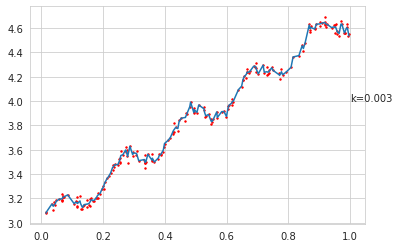

In [84]:
plt.figure(1)
plt.plot(x_sort[:,1],y_hat_1[sort_i])
plt.scatter(x_mat[:,1].A.flatten(),y,s=2,c='red')
plt.annotate("k=1",xy=(1,4))
plt.figure(2)
plt.plot(x_sort[:,1],get_lwlr(X,X,y,k=0.01)[sort_i])
plt.scatter(x_mat[:,1].A.flatten(),y,s=2,c='red')
plt.annotate("k=0.01",xy=(1,4))
plt.figure(3)
plt.plot(x_sort[:,1],get_lwlr(X,X,y,k=0.003)[sort_i])
plt.scatter(x_mat[:,1].A.flatten(),y,s=2,c='red')
plt.annotate("k=0.003",xy=(1,4))

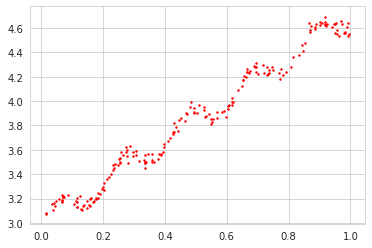

In [109]:

plt.scatter(x_mat[:,1].A.flatten(),y,s=2,c='red')

#### 实例-预测鲍鱼的年龄

In [110]:
!head -10 datasets/abalone.txt

In [111]:
ab_X,ab_y=load_data("datasets/abalone.txt")
ab_X[:10]

[[1.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15],
 [1.0, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07],
 [-1.0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21],
 [1.0, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155],
 [0.0, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055],
 [0.0, 0.425, 0.3, 0.095, 0.3515, 0.141, 0.0775, 0.12],
 [-1.0, 0.53, 0.415, 0.15, 0.7775, 0.237, 0.1415, 0.33],
 [-1.0, 0.545, 0.425, 0.125, 0.768, 0.294, 0.1495, 0.26],
 [1.0, 0.475, 0.37, 0.125, 0.5095, 0.2165, 0.1125, 0.165],
 [-1.0, 0.55, 0.44, 0.15, 0.8945, 0.3145, 0.151, 0.32]]

In [114]:
np.array(ab_X).shape

(4177, 8)

In [115]:
def mse(y,y_hat):
    return np.sum((y-y_hat)**2)

In [116]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [118]:
ab_X=np.array(ab_X)
ab_y=np.array(ab_y)

In [128]:
abX_train,abX_test,aby_train,aby_test=train_test_split(ab_X[:-1],ab_y[:-1],test_size=0.5,random_state=2020)
abX_train.shape

(2088, 8)

In [129]:
#1. 使用标准的线性回归作为测试
aby_hat=np.mat(abX_train)*stand_regression(abX_train,aby_train)
aby_hat.shape

(2088, 1)

In [146]:
mse(aby_train,aby_hat.A)

72291777.68014434

In [137]:
ab_ws=stand_regression(abX_train,aby_train)
ab_ws

matrix([[  0.05809283],
        [  9.87669437],
        [  9.95385118],
        [  8.54502613],
        [  8.55749092],
        [-21.65386337],
        [-10.2867542 ],
        [  8.46415064]])

In [147]:
mean_squared_error(aby_test,aby_hat.A)

4.927765395294492

In [142]:
aby_hat.T.A.shape

(1, 2088)

In [143]:
aby_test.shape

(2088,)

In [151]:
%%time
ab_hat_10=get_lwlr(ab_X[0:99],ab_X[0:99],ab_y[0:99],k=10)
ab_hat_01=get_lwlr(ab_X[0:99],ab_X[0:99],ab_y[0:99],k=0.1)
ab_hat_1=get_lwlr(ab_X[0:99],ab_X[0:99],ab_y[0:99])

CPU times: user 1.65 s, sys: 2.99 ms, total: 1.65 s
Wall time: 1.71 s


In [154]:
mse(ab_y[:99],ab_hat_01)

56.81087018378336

In [155]:
mse(ab_y[:99],ab_hat_1)

429.8905618700951

In [156]:
mse(ab_y[:99],ab_hat_10)

549.118170882647

In [157]:
mean_squared_error(ab_y[:99],ab_hat_01)

0.5738471735735693

#### 缩减系数
- 岭回归　L2正则化
- lasso L1

##### 岭回归
1. 岭回归实质上是X*X加上一个λI从而使得矩阵非奇异，进而可对(X*X+λI)求逆，矩阵I为一个m*m的单位矩阵，
主对角线元素为1，其他为0
2. 回归系数表示
- w=(X^T*X+λI)^-1*X.T*y

In [250]:
def ridge_regression(X, y, lambd=0.2):
    x_mat = np.mat(X)
    y_mat = np.mat(y).T
    x_Tx = x_mat.T * x_mat
    denom = x_Tx + lambd * np.eye(x_mat.shape[1])
    if np.linalg.det(denom) == 0.0:
        print("The matrix is singular, can't do inverse")
    return denom.I * (x_mat.T * y_mat)

In [167]:
#取30组不同的λ来获取岭系数矩阵包含30个不同的岭系数。
def ridge_traj(X, y, ntest=30):
    ''' 获取岭轨迹矩阵
    '''
    ws = np.zeros((ntest, X.shape[1]))
    for i in range(ntest):
        w = ridge_regression(X, y, r=np.exp(i-10))
        ws[i, :] = w.T
    return ws

In [244]:
def get_traj(X, y, method=ridge_regression,ntest=30):
    ws = np.zeros((ntest, X.shape[1]))
    for i in range(ntest):
        w = method(X, y, lambd=np.exp(i - 10))
        ws[i, :] = w.T
        if not (i-10)%10:
            print('lambda = e^({}), w = {}'.format(i - 10, w.T[0, :]))
    return ws

In [163]:
def standarize(X):
    """
    标准化数据
        X=X-mean(X)/var(X)
    """
    return (X-np.mean(X))/np.var(X)

In [238]:
def plot_traj(method=ridge_traj,num_test=30):
    # 中心化 & 标准化
    ab_Xs, ab_ys = standarize(ab_X), standarize(ab_y)
    # 绘制岭轨迹
    ab_ws = method(ab_Xs, ab_ys, num_test)
    lambdas = [i - 10 for i in range(num_test)]
    plt.plot(lambdas, ab_ws)

In [254]:
def traj(X, y, method=ridge_regression, ntest=30):
    # 中心化 & 标准化
    ab_Xs, ab_ys = standarize(ab_X), standarize(ab_y)
    # 绘制岭轨迹
    # 计算ws
    ab_ws = np.zeros((ntest, X.shape[1]))
    for i in range(ntest):
        w = method(X, y, lambd=np.exp(i - 10))
        ab_ws[i, :] = w.T
    if not (i - 10) % 10:
        print('lambda = e^({}), w = {}'.format(i - 10, w.T[0, :]))
    lambdas = [i - 10 for i in range(ntest)]
    plt.plot(lambdas, ab_ws)

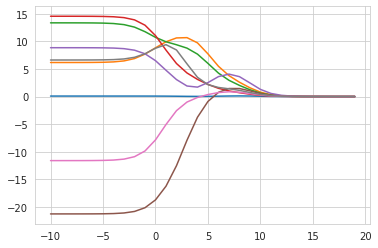

In [255]:
traj(ab_X,ab_y)

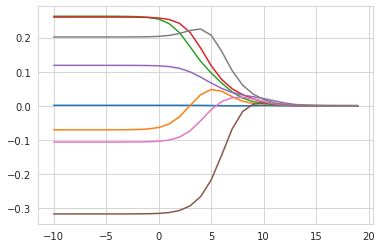

In [239]:
plot_traj()

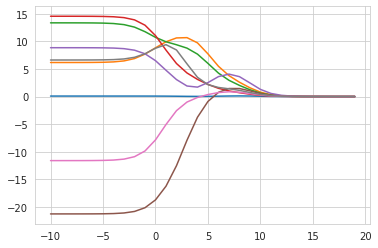

In [174]:
ridge_test()

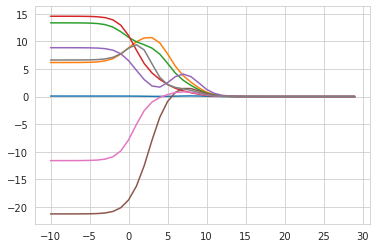

In [178]:
ridge_test(40)

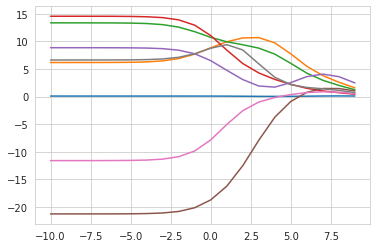

In [179]:
ridge_test(20)

##### lasso

- Lasso回归限定了所有回归系数的平方和不大于 t , 在使用普通最小二乘法回归的时候当两个变量具有相关性的时候，可能会使得其中一个系数是个很大正数，另一个系数是很大的负数。
- 通过Lasso回归的限制，可以避免这个问题

In [234]:
import itertools


def lasso_regression(X, y, lambd=0.2, threshold=0.1):
    ''' 通过坐标下降(coordinate descent)法获取LASSO回归系数
    '''
    X = np.mat(X)
    y = np.mat(y).T
    # 计算残差平方和
    rss = lambda X, y, w: (y - X * w).T * (y - X * w)
    # 初始化回归系数w.
    m, n = X.shape  # 2*8
    w = np.matrix(np.zeros((n, 1)))  # 1*8
    r = rss(X, y, w)
    # 使用坐标下降法优化回归系数w
    # loop until break
    niter = itertools.count(1)
    for it in niter:
        for k in range(n):  # 8
            # 计算常量值z_k和p_k
            z_k = (X[:, k].T * X[:, k])[0, 0]
            p_k = 0
            for i in range(m):  #2
                p_k += X[i, k] * (y[i, 0] - sum(
                    [X[i, j] * w[j, 0] for j in range(n) if j != k]))
            if p_k < -lambd / 2:
                w_k = (p_k + lambd / 2) / z_k
            elif p_k > lambd / 2:
                w_k = (p_k - lambd / 2) / z_k
            else:
                w_k = 0
            w[k, 0] = w_k
        r_prime = rss(X, y, w)
        delta = abs(r_prime - r)[0, 0]
        r = r_prime
        if not it % 10:
            print('Iteration: {}, delta = {}'.format(it, delta))
        if delta < threshold:
            print('Iteration: {}, delta = {}'.format(it, delta))
            break
    return w

In [235]:
%%time
ab_ws_lasso = lasso_regression(ab_Xs, ab_ys, lambd=10)
y_prime = ab_X * ab_ws_lasso
# 计算相关系数
corrcoef = np.corrcoef(np.array(ab_y.reshape(1, -1)),
                        np.array(y_prime.reshape(1, -1)))
print('Correlation coefficient: {}'.format(corrcoef[0,0]))

Iteration: 10, delta = 1.7819967548639113
Iteration: 20, delta = 0.24668413059958993
Iteration: 30, delta = 0.15028577685339428
Iteration: 40, delta = 0.12071266709378392
Iteration: 48, delta = 0.09841619214620323
Correlation coefficient: 1.0
CPU times: user 42.9 s, sys: 0 ns, total: 42.9 s
Wall time: 44 s


In [232]:
def lasso_traj(X, y, ntest=30):
    ''' 获取回归系数轨迹矩阵
    '''
    ws = np.zeros((ntest, X.shape[1]))
    for i in range(ntest):
        w = lasso_regression(X, y, lambd=np.exp(i - 10))
        ws[i, :] = w.T
        if not (i-10)%3:
            print('lambda = e^({}), w = {}'.format(i - 10, w.T[0, :]))
    return ws

Iteration: 10, delta = 1.6616253051308831
Iteration: 20, delta = 0.21589463236412598
Iteration: 30, delta = 0.1583830069655221
Iteration: 40, delta = 0.15071865630628167
Iteration: 50, delta = 0.13161213765044977
Iteration: 60, delta = 0.10864906515968187
Iteration: 64, delta = 0.09972539295361571
Iteration: 10, delta = 1.6616263613946956
Iteration: 20, delta = 0.2158949224348703
Iteration: 30, delta = 0.1583829664600387
Iteration: 40, delta = 0.15071855795306988
Iteration: 50, delta = 0.1316119063693293
Iteration: 60, delta = 0.10864881236219048
Iteration: 64, delta = 0.09972516448846136
lambda = e^(-9), w = [[ 0.00134386  0.07478261  0.14593872  0.08415416  0.05520629 -0.27757479
  -0.02495617  0.30721301]]
Iteration: 10, delta = 1.6616292326085613
Iteration: 20, delta = 0.21589571092539472
Iteration: 30, delta = 0.15838285635288685
Iteration: 40, delta = 0.1507182906003095
Iteration: 50, delta = 0.13161127767992298
Iteration: 60, delta = 0.10864812518457256
Iteration: 64, delta = 0.

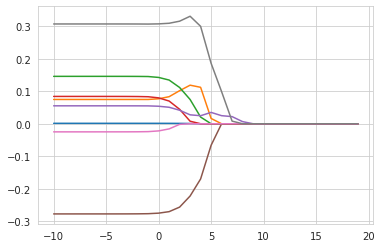

In [240]:
%%time
plot_traj(method=lasso_traj)

##### 逐步向前回归
－　LASSO计算复杂度相对较高，本部分稍微介绍一下逐步向前回归，他属于一种贪心算法，给
定初始系数向量，然后不断迭代遍历每个系数，增加或减小一个很小的数，
看看代价函数是否变小，如果变小就保留，如果变大就舍弃，然后不断迭代直到回归系数达到稳定

In [257]:
def stagewise_regression(X, y, lambd=0.01, niter=100):
    m, n = X.shape
    w = np.matrix(np.zeros((n, 1)))
    min_error = float('inf')
    all_ws = np.matrix(np.zeros((niter, n)))
    # 计算残差平方和
    rss = lambda X, y, w: (y - X * w).T * (y - X * w)
    for i in range(niter):
        if not i % 10:
            print('{}: w = {}'.format(i, w.T[0, :]))
        for j in range(n):
            for sign in [-1, 1]:
                w_test = w.copy()
                w_test[j, 0] += lambd * sign
                test_error = rss(X, y, w_test)
                if test_error < min_error:
                    min_error = test_error
                    w = w_test
        all_ws[i, :] = w.T
    return all_ws

In [258]:
traj(ab_X,ab_y,method=stagewise_regression)

0: w = [[0. 0. 0. 0. 0. 0. 0. 0.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()